In [56]:
import pandas as pd
from scipy import stats
from math import log

In [57]:
df = pd.read_csv("nba2k20-full.csv")
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [58]:
df.team.fillna("none", inplace=True)
df.college.fillna("none", inplace=True)

In [59]:
def get_weight(series: pd.Series) -> pd.Series:
    return series.str.extract(r'(\d+) lbs\. / (\d+(\.\d+|)) kg\.')[1].apply(float)

def get_height(series: pd.Series) -> pd.Series:
    return series.str.extract(r'((\d+)-(\d+)) / (\d+(\.\d+|))')[3].apply(float)

df = df.assign(weight_kg=df.weight.pipe(get_weight)) \
        .assign(height_m=df.height.pipe(get_height))
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,weight_kg,height_m
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,none,113.4,2.06
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,102.1,2.01
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,none,109.8,2.11
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,104.3,2.08
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,99.8,1.96


In [60]:
df.salary = df.salary.str.slice(1).apply(int)
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,weight_kg,height_m
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,37436858,USA,2003,1,1,none,113.4,2.06
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,32742000,USA,2011,1,15,San Diego State,102.1,2.01
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,25842697,Greece,2013,1,15,none,109.8,2.11
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,37199000,USA,2007,1,2,Texas,104.3,2.08
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,38199000,USA,2009,1,3,Arizona State,99.8,1.96


In [61]:
columns = ["rating", "weight_kg", "height_m", "salary"]
for column_name in columns:
    print(
        f"Column: {column_name} p-value of being normal: {stats.normaltest(df[column_name]).pvalue:.4f}; p-value of being log-normal: {stats.normaltest(df[column_name].map(log)).pvalue:.4f}"
    )

Column: rating p-value of being normal: 0.0000; p-value of being log-normal: 0.0000
Column: weight_kg p-value of being normal: 0.0044; p-value of being log-normal: 0.0306
Column: height_m p-value of being normal: 0.0886; p-value of being log-normal: 0.0428
Column: salary p-value of being normal: 0.0000; p-value of being log-normal: 0.0000


In [62]:
len(df.position.unique())

7

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = df[columns]
y = LabelEncoder().fit_transform(df.position)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y,
                                                    shuffle=True)

In [64]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

for (name, model) in [
        ("Decision tree", DecisionTreeClassifier(random_state=1)),
        ("Random forest", RandomForestClassifier(n_estimators=100, random_state=1)),
        ("KNN", KNeighborsClassifier(n_neighbors=10)),
        ("Logistic regression", LogisticRegression(random_state=1)),
        ("Sigmoid SVM", SVC(kernel='sigmoid', random_state=1)),
        ("Linear SVM", LinearSVC(max_iter=1e5, random_state=1)),
        ("MLP", MLPClassifier(random_state=1))
        ]:
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    print(
        f"{name} has balanced accuracy of {balanced_accuracy_score(y_test, predicted, adjusted=True)}"
    )

Decision tree has balanced accuracy of 0.2101540616246498
Random forest has balanced accuracy of 0.27710084033613447
KNN has balanced accuracy of -0.01099439775910362
Logistic regression has balanced accuracy of 0.0
Sigmoid SVM has balanced accuracy of 0.04355742296918769
Linear SVM has balanced accuracy of 0.0238095238095238
MLP has balanced accuracy of 0.0


/home/jovvik/.local/share/virtualenvs/labs-cS06rTfs/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


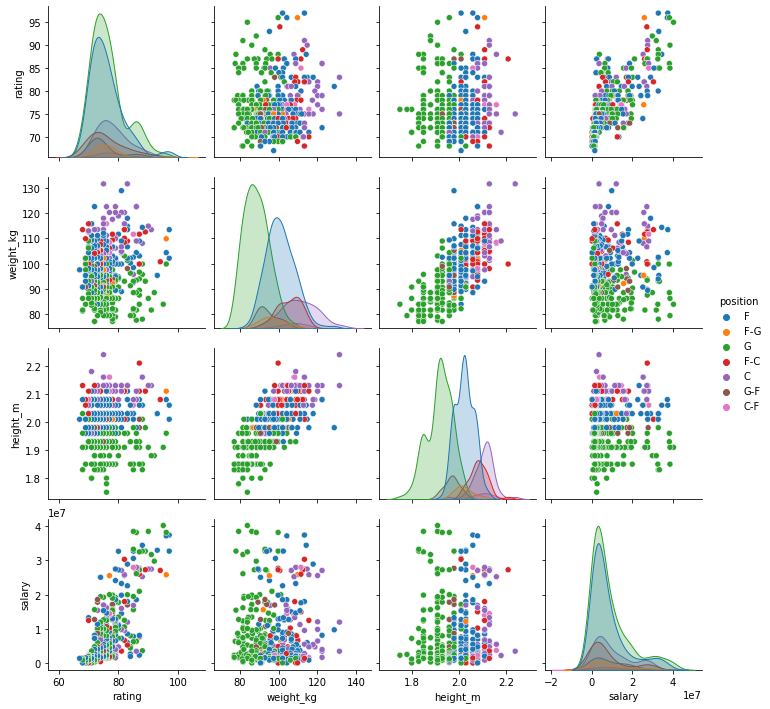

In [65]:
import seaborn as sns

sns.pairplot(pd.concat([X, df.position], axis=1), hue='position')

<AxesSubplot:xlabel='weight_kg', ylabel='Count'>

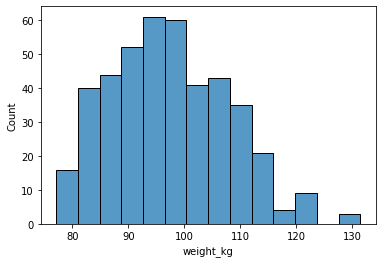

In [66]:
sns.histplot(df, x="weight_kg")